# Libraries

In [241]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting Function

In [242]:
def plotsir(t, S, E, I, R, D,x0):
  f, ax = plt.subplots(1,1,figsize=(10,5))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
  ax.plot(t, S+E+I+R+D, 'k', alpha=0.7, linewidth=1, label='Total')

  plt.title("Epidemic with L = "+str(x0))
  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Number of people')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.savefig("Res_Age_dep_L = "+str(x0))
  plt.show();

def plot(y, t, label, title,x0, xlabel="Time (days)", ylabel="Value"):
    plt.figure(figsize=(8, 5))
    plt.plot(t, y, label=label, linewidth=2)
    plt.title(title+" x0 = "+str(x0), fontsize=14, fontweight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(title)
    plt.show()

# Derivatives

In [243]:
def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

# Initial Conditions

In [244]:
N = 1000000 # Total no. of people
D = 4.0 # no. of days the infection lasts
gamma = 1.0 / D # recovery rate
delta = 1.0/5.0 #incubation period
R_0_start, k, x0, R_0_end = 5.0, 0.5, 50, 0.5

def logistic_R_0(t):
    return (R_0_start-R_0_end) / (1 + np.exp(-k*(-t+x0))) + R_0_end

def beta(t):
    return logistic_R_0(t) * gamma 

alpha_by_agegroup = {"0-29": 0.01, "30-59": 0.05, "60-89": 0.2, "89+": 0.3}
proportion_of_agegroup = {"0-29": 0.1, "30-59": 0.3, "60-89": 0.4, "89+": 0.2}
s = 1.0
alpha_opt = sum(alpha_by_agegroup[i] * proportion_of_agegroup[i] for i in list(alpha_by_agegroup.keys()))

rho = 1/9 # days until death from infection
S0, E0, I0, R0, D0 = N-1 , 1, 0, 0, 0  # initial conditions

# Solving the ODE

In [245]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T
R0_over_time = [logistic_R_0(i) for i in range(len(t))]  # to plot R_0 over time: get function values
Alpha_over_time = [s * I[i]/N + alpha_opt for i in range(len(t))]  # to plot alpha over time

# Plotting

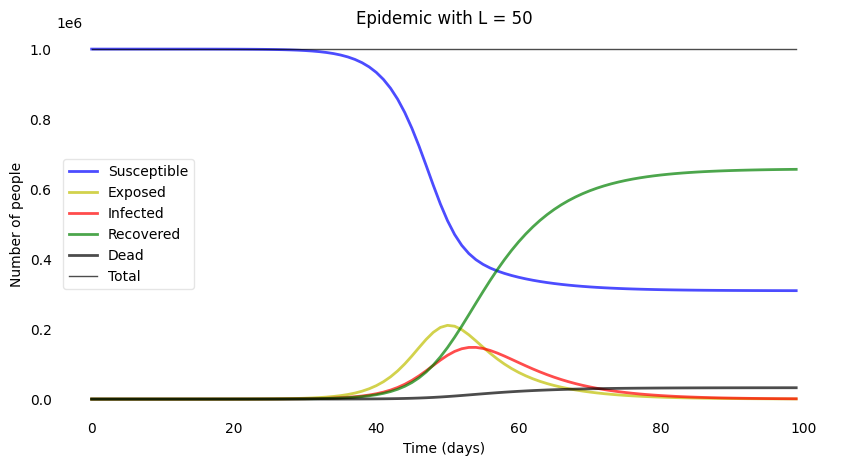

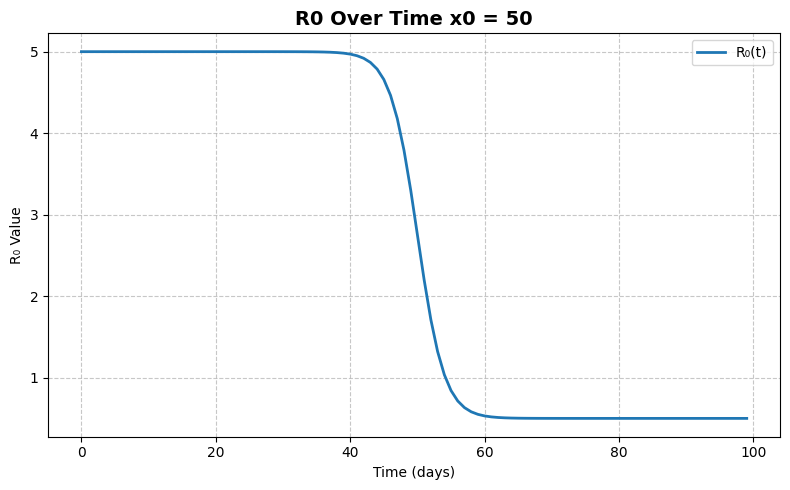

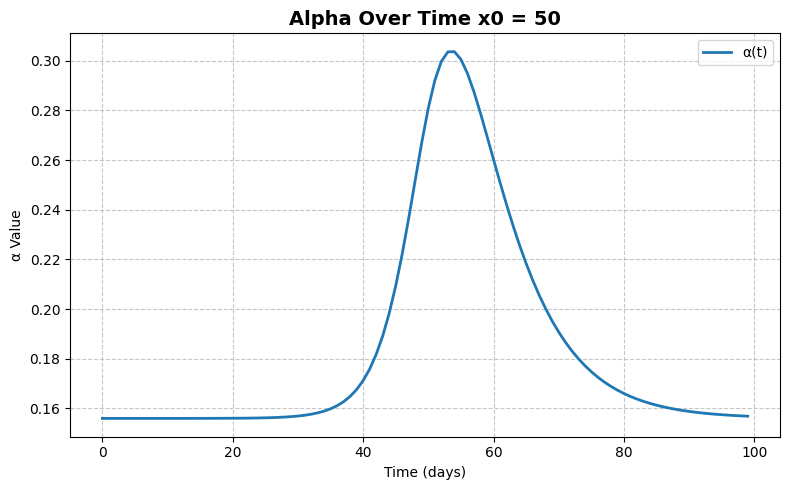

In [246]:
plotsir(t, S, E, I, R, D,x0=x0)
plot(R0_over_time, t, label="R₀(t)", title="R0 Over Time",x0=x0, ylabel="R₀ Value")
plot(Alpha_over_time, t, label="α(t)", title="Alpha Over Time",x0=x0, ylabel="α Value")